## Handling  Imbalanced Classification Using Neural Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##https://www.kaggle.com/mlg-ulb/creditcardfraud
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: >

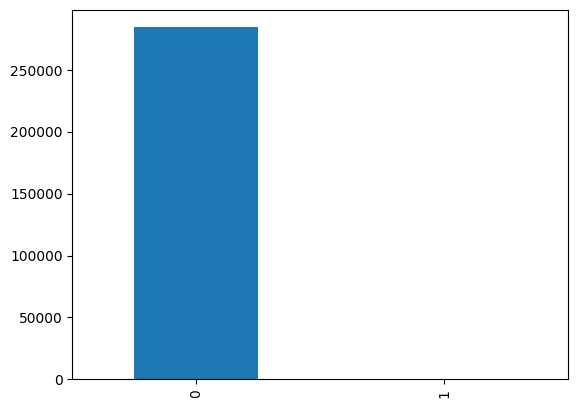

In [ ]:
pd.value_counts(df['Class']).plot.bar()

In [ ]:
### Intitially
Step1 -We Will Create an ANN and solve this problem(ROC AUC)
Step2- We will use some Weights handling techniques to solve this imbalanced then we create
The ANN

In [ ]:
len(df.columns)

31

In [ ]:
X=df.iloc[:,1:30]
y=df.iloc[:,-1]

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
y_train.value_counts()

0    199008
1       356
Name: Class, dtype: int64

In [ ]:
##Step1
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
print(len(X.columns))
n_inputs=29

29


In [ ]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 21s 3ms/step - loss: 0.0180
Epoch 2/10
6231/6231 [==============================] - 19s 3ms/step - loss: 0.0131
Epoch 3/10
6231/6231 [==============================] - 19s 3ms/step - loss: 0.0133
Epoch 4/10
6231/6231 [==============================] - 18s 3ms/step - loss: 0.0091
Epoch 5/10
6231/6231 [==============================] - 19s 3ms/step - loss: 0.0088
Epoch 6/10
6231/6231 [==============================] - 19s 3ms/step - loss: 0.0103
Epoch 7/10
6231/6231 [==============================] - 19s 3ms/step - loss: 0.0077
Epoch 8/10
6231/6231 [==============================] - 19s 3ms/step - loss: 0.0078
Epoch 9/10
6231/6231 [==============================] - 20s 3ms/step - loss: 0.0078
Epoch 10/10
6231/6231 [==============================] - 19s 3ms/step - loss: 0.0069


In [ ]:
from sklearn.metrics import roc_auc_score
y_pred1=model.predict(X_test)

print(roc_auc_score(y_test,y_pred1))

2671/2671 [==============================] - 5s 2ms/step
0.9388457019250196


### Weighted Neural Network With Keras
* Define Weights
* Fit the model with thos specific weights


In [ ]:
weights_assigned={0:1,1:550}

In [ ]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,class_weight=weights_assigned,epochs=10)

Epoch 1/10
6231/6231 [==============================] - 22s 3ms/step - loss: 3.9016
Epoch 2/10
6231/6231 [==============================] - 20s 3ms/step - loss: 3.0381
Epoch 3/10
6231/6231 [==============================] - 19s 3ms/step - loss: 1.9458
Epoch 4/10
6231/6231 [==============================] - 20s 3ms/step - loss: 2.9091
Epoch 5/10
6231/6231 [==============================] - 20s 3ms/step - loss: 2.4310
Epoch 6/10
6231/6231 [==============================] - 20s 3ms/step - loss: 3.4808
Epoch 7/10
6231/6231 [==============================] - 19s 3ms/step - loss: 2.5151
Epoch 8/10
6231/6231 [==============================] - 20s 3ms/step - loss: 2.0436
Epoch 9/10
6231/6231 [==============================] - 19s 3ms/step - loss: 2.9264
Epoch 10/10
6231/6231 [==============================] - 20s 3ms/step - loss: 2.7742


In [ ]:
y_pred=model.predict(X_test)

2671/2671 [==============================] - 4s 2ms/step


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test,y_pred)

0.9647770440188689